# Success of The Office episodes

In [1]:
# for dataframes
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
# for numerical arrays 
import numpy as np

**The data for the analysis was collected from [Kaggle](https://www.kaggle.com/) website.** [[3, 4 & 5]](#References)

In [2]:
office_episodes = pd.read_csv("the_office_episodes.csv")
office_imdb = pd.read_csv("the_office_imdb.csv")
office_series = pd.read_csv("the_office_series.csv")
office_lines = pd.read_csv("The-Office-Lines-V4.csv")

## Investigating the dataframes

In [3]:
# printing out the dataframe
office_episodes.head(5)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,1001,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,1002,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,1006,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,1004,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,1005,5000000.0


In [4]:
# printing out the dataframe
office_imdb.head(5)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [5]:
# printing out the dataframe
office_series.head(5)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


I am deciding not to use office_episodes dataframe in the research since all the data are available in office_imdb and office_series dataframes. 

In [17]:
# printing the dataframe
office_lines.head(5)

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


In [7]:
# episodes in which Michael has a line 
michael_in = office_lines[office_lines['speaker'] == 'Michael']
michael_in.head(10)

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager...",NaN
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...",NaN
8,1,1,Pilot,3,Michael,"If you think she's cute now, you should have s...",NaN
10,1,1,Pilot,3,Michael,Any messages?,NaN
12,1,1,Pilot,3,Michael,"Oh! Pam, this is from Corporate. How many time...",NaN
14,1,1,Pilot,3,Michael,It's called the wastepaper basket! Look at tha...,NaN
15,1,1,Pilot,4,Michael,"People say I am the best boss. They go, ""God w...",NaN


In [8]:
# seasons and episodes in which Michael has a line
michael_in = michael_in[['season', 'episode']].groupby(['season', 'episode']).size().reset_index(name='count_lines')
michael_in.head(5)

,season,episode,count_lines
0,1,1,81
1,1,2,75
2,1,3,55
3,1,4,68
4,1,5,104


In [9]:
# adding new column 
michael_in['Michael_in'] = 'Yes'
# rename the column
michael_in = michael_in.rename(columns = {'episode':'episode_num'})
# selecting the relevant columns
michael_in = michael_in[['season', 'episode_num', 'Michael_in']]
michael_in.head(5)

,season,episode_num,Michael_in
0,1,1,Yes
1,1,2,Yes
2,1,3,Yes
3,1,4,Yes
4,1,5,Yes


## Concat and join 

In [10]:
# joining two dataframes
office_joined = office_series.join(office_imdb, how='left')
office_joined.head(5)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [11]:
# selecting only the relevant columns
office = office_joined[['season', 'episode_num', 'title', 'original_air_date', 'imdb_rating', 
                        'total_votes', 'desc', 'Viewership', 'Duration', 'GuestStars', 'Director', 'Writers']]
office.head(5)

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc,Viewership,Duration,GuestStars,Director,Writers
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...,11.2,23,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...,6.0,23,NaN,Ken Kwapis,B. J. Novak
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...,5.8,22,NaN,Ken Whittingham,Paul Lieberstein
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi...",5.4,23,NaN,Bryan Gordon,Michael Schur
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...,5.0,23,NaN,Greg Daniels,Greg Daniels


In [12]:
# merging two dataframes
office = pd.merge(office, michael_in, how='left', on=['season', 'episode_num'])
office

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc,Viewership,Duration,GuestStars,Director,Writers,Michael_in
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...,11.20,23,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,Yes
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...,6.00,23,NaN,Ken Kwapis,B. J. Novak,Yes
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...,5.80,22,NaN,Ken Whittingham,Paul Lieberstein,Yes
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi...",5.40,23,NaN,Bryan Gordon,Michael Schur,Yes
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...,5.00,23,NaN,Greg Daniels,Greg Daniels,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,9,19,Stairmageddon,2013-04-11,8.0,2961,Dwight shoots Stanley with a bull tranquilizer...,3.83,22,NaN,Matt Sohn,Dan Sterling,NaN
184,9,20,Paper Airplane,2013-04-25,8.0,3040,The employees hold a paper airplane competitio...,3.25,22,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,NaN
185,9,21,Livin' the Dream,2013-05-02,9.1,4448,Dwight becomes regional manager after Andy qui...,3.51,42,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,NaN
186,9,22,A.A.R.M.,2013-05-09,9.5,5930,Dwight prepares for a marriage proposal and hi...,4.56,43,NaN,David Rogers,Brent Forrester,NaN


***
I decided the best measure of success of The Office episodes is viewership number. Accordingly Viewership = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 * x4 + epsilon, 
where: 
* beta 0 is the average baseline happiness, 
* betas are additional change in the success that comes from one additional value of the variable x, 
* x's are independent variables, 
* epsilon is the extra noise.

## Finding the distribution of the variables

<AxesSubplot:ylabel='Frequency'>

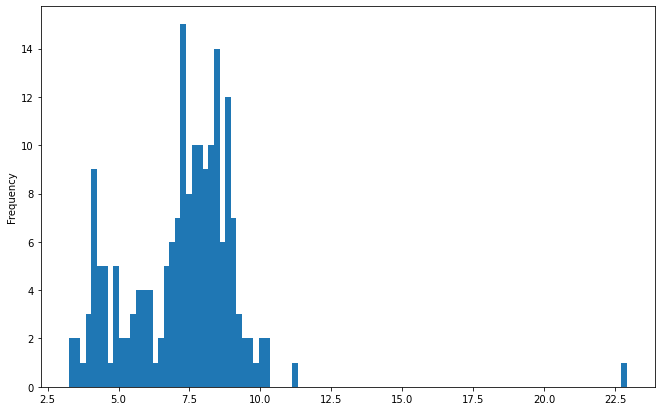

In [13]:
# plotting the viewership distribution 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['Viewership'].plot.hist(bins = 100)

Histogram above is showing the normal distributions for the viewership data. 

<AxesSubplot:ylabel='Frequency'>

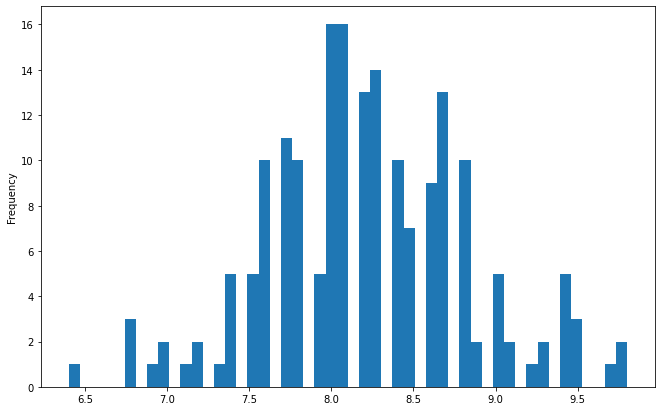

In [14]:
# plotting the IMBD ratings distribution 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['imdb_rating'].plot.hist(bins = 50)

Histogram above is showing the normal distributions for the imdb ratings data.

<AxesSubplot:ylabel='Frequency'>

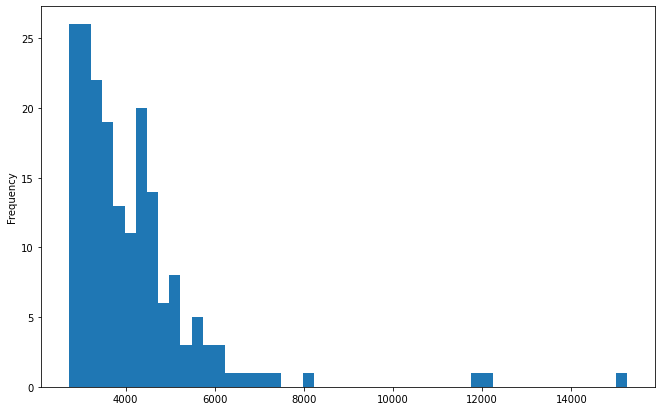

In [15]:
# plotting the distribution for total votes 
fig, ax = plt.subplots(1, 1, figsize = (11,7))

office['total_votes'].plot.hist(bins = 50)

Histogram above is showing the exponentinal distributions for the total voting data.

Variable Michael_in has a binomal distribution (yes/no). [[1]](#References)

## Relationships between variables

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))

# plotting the relationship between viewership and imdb ratings 
ax.scatter(y=office['imdb_rating'],
           x=office['Viewership'])
ax.set_title("IMDB ratings vs viewership") # setting the title
ax.set_xlabel("Viewership(mil)") # setting the x label
ax.set_ylabel("IMDB ratings") # setting the y label

## References
1. Heiss, A. (2020, November 4). The ultimate guide to generating synthetic data for causal inference. Program Evaluation. Retrieved December 11, 2021, from https://evalf20.classes.andrewheiss.com/example/synthetic-data/
2. Brownlee, J. (2020, January 10). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved December 11, 2021, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
3. The Office Dataset. (2020, September 8). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/nehaprabhavalkar/the-office-dataset
4. The Office (US) - Complete Dialogue/Transcript. (2021, January 18). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/nasirkhalid24/the-office-us-complete-dialoguetranscript
5. The Office Episodes Data. (2021, November 8). Kaggle. Retrieved December 12, 2021, from https://www.kaggle.com/bcruise/the-office-episodes-data
6. Frost, J. (2021, November 18). How to Identify the Distribution of Your Data. Statistics By Jim. Retrieved December 18, 2021, from https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
7. P. (2021, January 4). Pandas - Merge DataFrames on Multiple Columns. Data Science Parichay. Retrieved December 21, 2021, from https://datascienceparichay.com/article/pandas-merge-dataframes-on-multiple-columns/
8. pandas.DataFrame.merge — pandas 1.3.5 documentation. (n.d.). Pandas. Retrieved December 21, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
9. Merge, join, concatenate and compare — pandas 1.3.5 documentation. (n.d.). Pandas. Retrieved December 21, 2021, from https://pandas.pydata.org/docs/user_guide/merging.html#merging

## End